In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.python.util.deprecation as deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

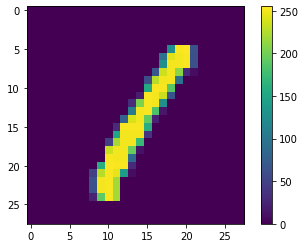

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.imshow(x_train[3])
plt.colorbar()
plt.show()

x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape((x_train.shape[0],784)) #TODO: keep reading until sess.run then uncomment and finish this. There are many ways of doing this task but look into a reshape operation in numpy
x_test = x_test.reshape((x_test.shape[0],784))

In [3]:
print("shape of our training input: {}".format(x_train.shape))
#print(x_train[0])

shape of our training input: (60000, 784)


In [4]:
#Parameters
learning_rate = 0.01
num_epochs = 200
batch_size = 128
display_step = 100
examples_to_show = 15

#Network Parameters
n_hidden_1 = 128
n_hidden_2 = 64
n_hidden_3 = 24
n_input = 784

In [5]:
#Visible Layer
X = tf.placeholder("float", [None, n_input])

"""
Note how the hidden layers of the encoder and decorder are "mirrored".
"""
weights = {
    'e_1' : tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'e_2' : tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'e_3' : tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'd_1' : tf.Variable(tf.random_normal([n_hidden_3, n_hidden_2])),
    'd_2' : tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'd_3' : tf.Variable(tf.random_normal([n_hidden_1, n_input]))
}

biases = {
    'e_1' : tf.Variable(tf.random_normal([n_hidden_1])),
    'e_2' : tf.Variable(tf.random_normal([n_hidden_2])),
    'e_3' : tf.Variable(tf.random_normal([n_hidden_3])),
    'd_1' : tf.Variable(tf.random_normal([n_hidden_2])),
    'd_2' : tf.Variable(tf.random_normal([n_hidden_1])),
    'd_3' : tf.Variable(tf.random_normal([n_input]))
}

In [6]:
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['e_1']),
                                   biases['e_1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['e_2']),
                                   biases['e_2']))
    
    layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['e_3']),
                                   biases['e_3']))
    return layer_3

def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['d_1']),
                                   biases['d_1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['d_2']),
                                   biases['d_2']))
    
    layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['d_3']),
                                   biases['d_3']))
    return layer_3

In [7]:
#Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

#Prediction
y_pred = decoder_op

#Targets (Labels) are the input data
y_true = X

#Define loss and optimizer, minimal square error
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0001 cost= 0.051189706
Epoch: 0002 cost= 0.042612143
Epoch: 0003 cost= 0.038166810
Epoch: 0004 cost= 0.033312064
Epoch: 0005 cost= 0.031956945
Epoch: 0006 cost= 0.030899709
Epoch: 0007 cost= 0.029975122
Epoch: 0008 cost= 0.028453819
Epoch: 0009 cost= 0.027929766
Epoch: 0010 cost= 0.027099667
Epoch: 0011 cost= 0.025798950
Epoch: 0012 cost= 0.024831753
Epoch: 0013 cost= 0.023829017
Epoch: 0014 cost= 0.023689961
Epoch: 0015 cost= 0.022750163
Epoch: 0016 cost= 0.021691428
Epoch: 0017 cost= 0.021223389
Epoch: 0018 cost= 0.021170268
Epoch: 0019 cost= 0.022406086
Epoch: 0020 cost= 0.021600232
Epoch: 0021 cost= 0.021142269
Epoch: 0022 cost= 0.020649506
Epoch: 0023 cost= 0.020361070
Epoch: 0024 cost= 0.020547882
Epoch: 0025 cost= 0.020825885
Epoch: 0026 cost= 0.019820884
Epoch: 0027 cost= 0.019371722
Epoch: 0028 cost= 0.018717751
Epoch: 0029 cost= 0.018151822
Epoch: 0030 cost= 0.017904937
Epoch: 0031 cost= 0.017941728
Epoch: 0032 cost= 0.017852582
Epoch: 0033 cost= 0.017819216
Epoch: 003

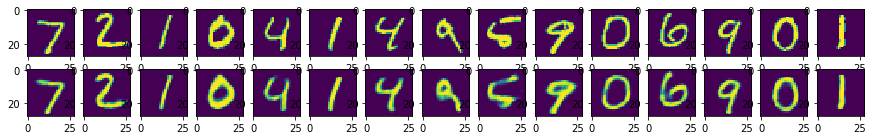

<Figure size 432x288 with 0 Axes>

In [8]:
#Launch the graph
with tf.Session() as sess:
    sess.run(init)
    
    #Train
    for epoch in range(num_epochs):
        #Loop over batches
        for i in range(x_train.shape[0]//batch_size):
            batch_xs = x_train[i*batch_size:(i+1)*batch_size]
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        print("Epoch:", '%04d' % (epoch+1),
                "cost=", "{:.9f}".format(c))
    print("Optimization Finished!")
    
    #Applying encode and decode overt test set
    encode_decode = sess.run(
        y_pred, feed_dict={X: x_test})
    # Compare original images with their reconstructions
    f, a = plt.subplots(2, 15, figsize=(15, 2))
    for i in range(examples_to_show):
        a[0][i].imshow(np.reshape(x_test[i], (28, 28)))
        a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))
    plt.show()
    plt.draw()